在机器学习中，常用的距离度量方式包括欧式距离、曼哈顿距离、余弦距离以及切比雪夫距离等。在 k 近邻算法中常用的距离度量方式是欧式距离，也即 L2 距离，L2 距离计算公式如下：

![title](645.webp)

In [1]:
import numpy as np
from collections import Counter
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target.reshape((-1, 1))
print(X.shape, y.shape)

(150, 2) (150, 1)


In [4]:
X, y = shuffle(iris.data, iris.target, random_state=13)
X = X.astype(np.float32)
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.7)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (105, 4)
X_test= (45, 4)
y_train= (105, 1)
y_test= (45, 1)


In [5]:
def compute_distances(X, X_train):
    num_test = X.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 

    M = np.dot(X, X_train.T)
    te = np.square(X).sum(axis=1) #square平方，sqrt开方
    tr = np.square(X_train).sum(axis=1)
    dists = np.sqrt(-2 * M + tr + np.matrix(te).T)  #这里为展开状态  
    return dists

In [7]:
dists = compute_distances(X_test,X_train)
print(dists.shape)

(45, 105)


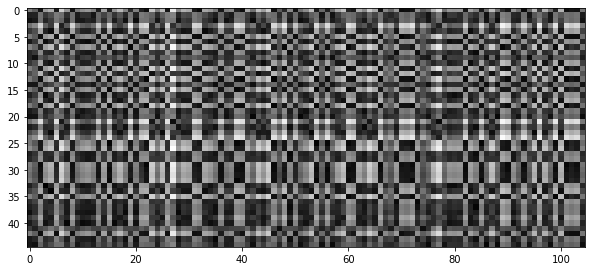

In [8]:
plt.imshow(dists, interpolation='none')
plt.show()

In [9]:
def predict_labels(y_train, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)    
    for i in range(num_test):

        closest_y = []
        # 注意 argsort 函数的用法
        labels = y_train[np.argsort(dists[i, :])].flatten() #排序
        closest_y = labels[0:k] #取最近的k个近邻

        c = Counter(closest_y) #算近邻的标签
        y_pred[i] = c.most_common(1)[0][0]    #根据最多标签确定预测标签
    return y_pred

In [12]:
y_test_pred = predict_labels(y_train, dists, k=1)
y_test_pred = y_test_pred.reshape((-1, 1))
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / X_test.shape[0]
print('Got %d / %d correct => accuracy: %f' % (num_correct, X_test.shape[0], accuracy))


Got 44 / 45 correct => accuracy: 0.977778
